<a href="https://colab.research.google.com/github/hmjibril/HJ_workspace/blob/main/Predicting_Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction

This project focuses on predicting the likelihood of heart disease using machine-learning techniques. The dataset includes clinical features such as age, sex, cholesterol levels, chest pain type, exercise-induced angina, and ECG results.
The goal is to explore the data, handle missing or incorrect values, visualize key patterns, engineer relevant features, and build a predictive model using the k-Nearest Neighbors (k-NN) algorithm.

2. Importing Libraries

This section imports all essential Python libraries for data manipulation, visualization, preprocessing, machine learning, and model evaluation.

pandas, numpy → data analysis

matplotlib, seaborn → charts

sklearn → preprocessing, model training, tuning, accuracy evaluation

In [2]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

3. Loading the Dataset

We loaded the heart_disease_prediction.csv file into a pandas DataFrame to begin exploration.
.head() displays the first few rows to understand the structure.

In [3]:
# Loading the "Heart Disease Prediction" Dataset

heart_disease_df = pd.read_csv("/content/heart_disease_prediction.csv")

heart_disease_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


4. Dataset Overview

info() provides details such as number of rows/columns, feature types, and missing values.
This helps identify which columns require cleaning or conversion.

In [4]:
# info()method provides the total number of rows, total columns, count of non-null values, and dtype of the Dataset:

heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


5. Missing Value Analysis

isnull().sum() checks for missing or incorrectly recorded values.
This step ensures data quality before performing modeling.

In [12]:
# Haddling Missing Values

heart_disease_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


6. Statistical Summary

describe() generates descriptive statistics (mean, median, std, etc.) for numerical columns.
describe(include="object") gives summary of categorical variables.

In [6]:
# Generate Statitical summary

heart_disease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
heart_disease_df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


7. Visualizing Categorical Columns

We created bar charts (countplots) for categorical variables such as Sex, ChestPainType, ExerciseAngina, and ST_Slope.
These charts show how patient categories are distributed and how they relate to heart disease.

The second set of charts visualizes:
Categorical Feature vs HeartDisease (0 or 1)
This helps identify strong predictors.

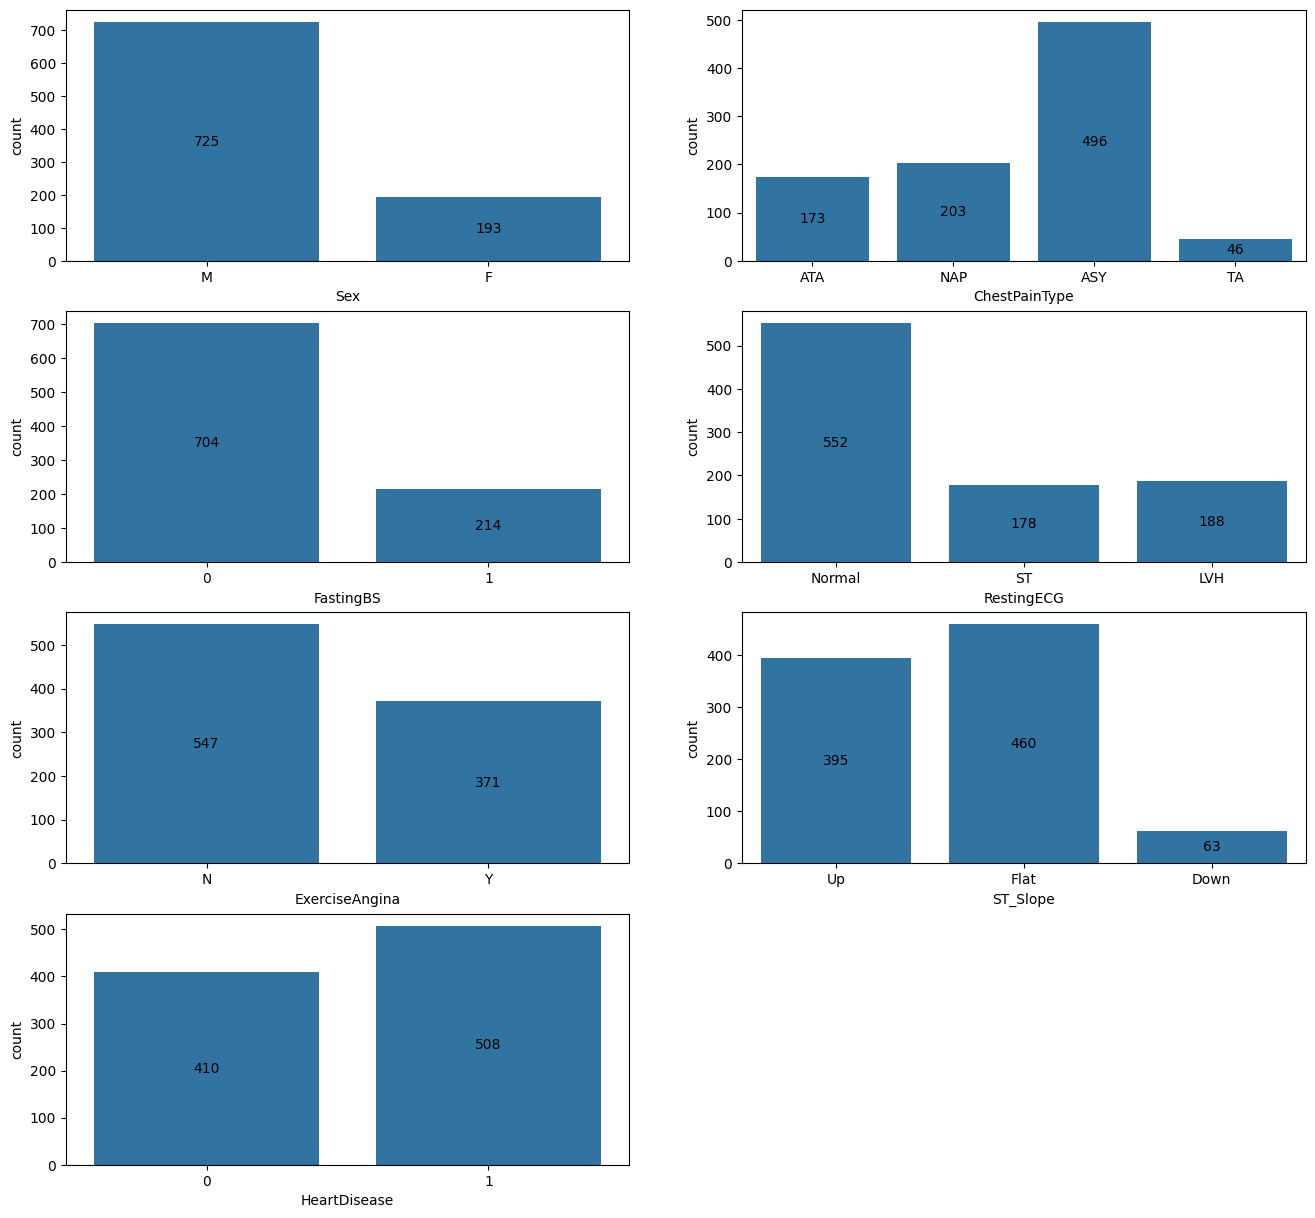

In [8]:
# Plotting Categorical Columns

categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart_disease_df[col], ax=ax)

    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

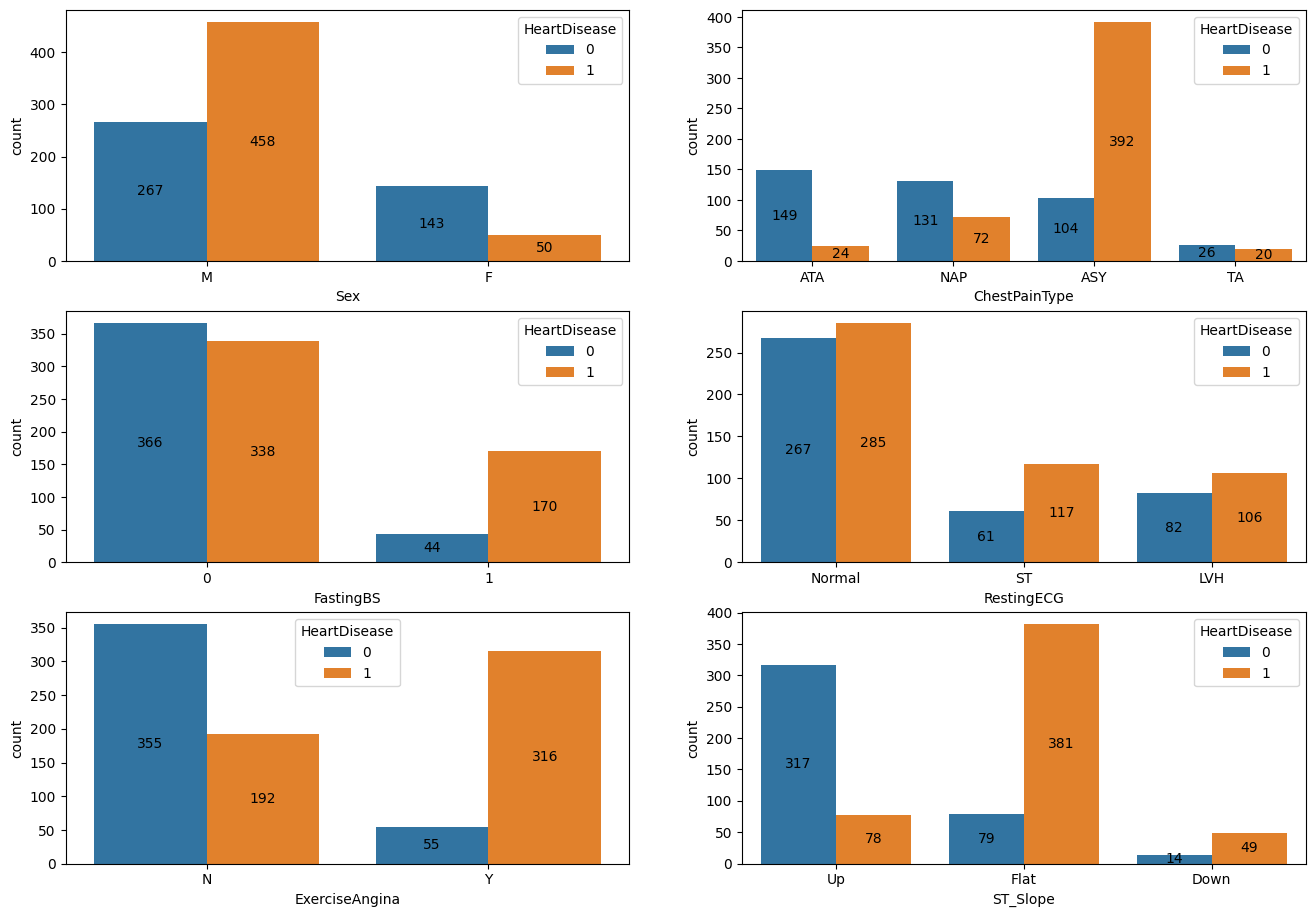

In [9]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)

    # group by HeartDisease

    sns.countplot(x=heart_disease_df[col], hue=heart_disease_df["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

8. Data Cleaning: Fixing Zero Values

Some medical records contain 0 for features where zero is impossible (e.g., RestingBP, Cholesterol).
Removed rows with impossible values

* Removed rows with impossible values
* Replaced zero cholesterol values with the median, split by heart disease status. This improves model accuracy.




In [13]:
heart_disease_df[heart_disease_df["RestingBP"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


In [14]:
heart_disease_df[heart_disease_df["Cholesterol"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [16]:
# Copy Clean "heart_disease_df" Dataset

clean_heart_disease_df = heart_disease_df.copy()

df_clean = heart_disease_df[heart_disease_df["RestingBP"] != 0]

heartdisease_mask = heart_disease_df["HeartDisease"]==0

cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

In [18]:
df_clean[["Cholesterol", "RestingBP" ]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


9. One-Hot Encoding

Categorical variables are converted into machine-learning-ready numeric features using pd.get_dummies().
drop_first=True prevents multicollinearity.

In [19]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


10. Correlation Heatmaps

Two heatmaps are generated:

*  Full correlation matrix (all features)
*  Filtered correlation matrix (only correlations > 0.30)

This helps identify the most influential predictors, such as:

* MaxHR
* Oldpeak
* ExerciseAngina_Y
* ST_Slope_Flat / Up











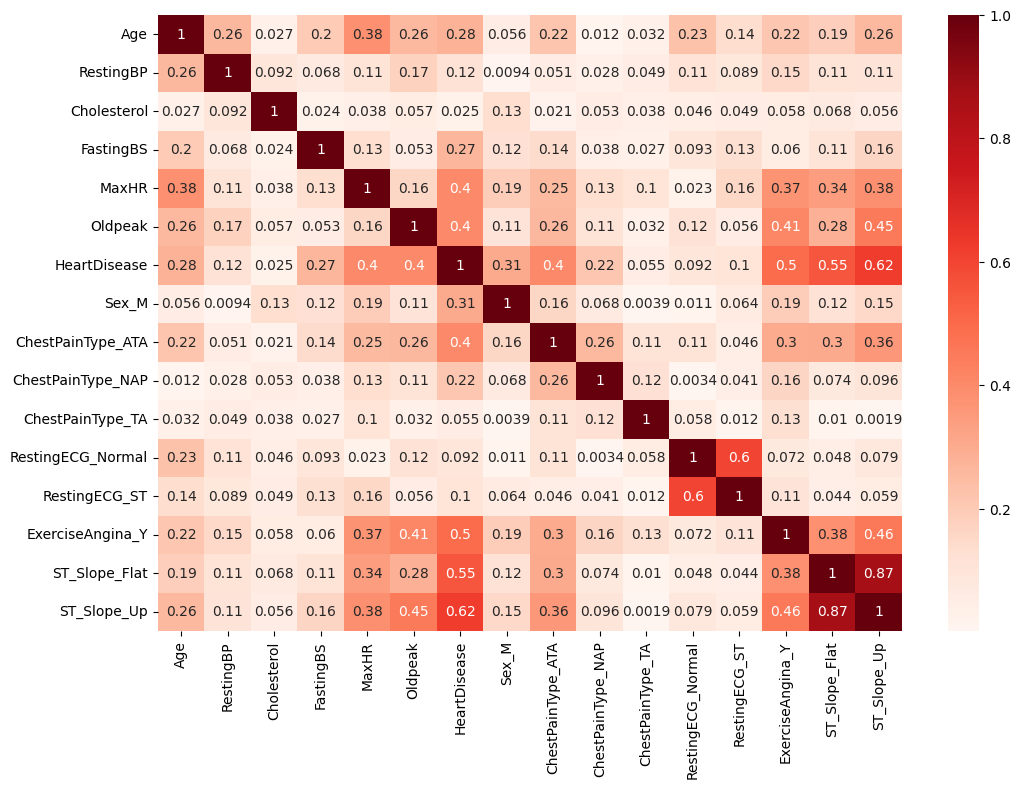

In [23]:
# Create Heatmap

correlations = abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="Reds")
plt.show()

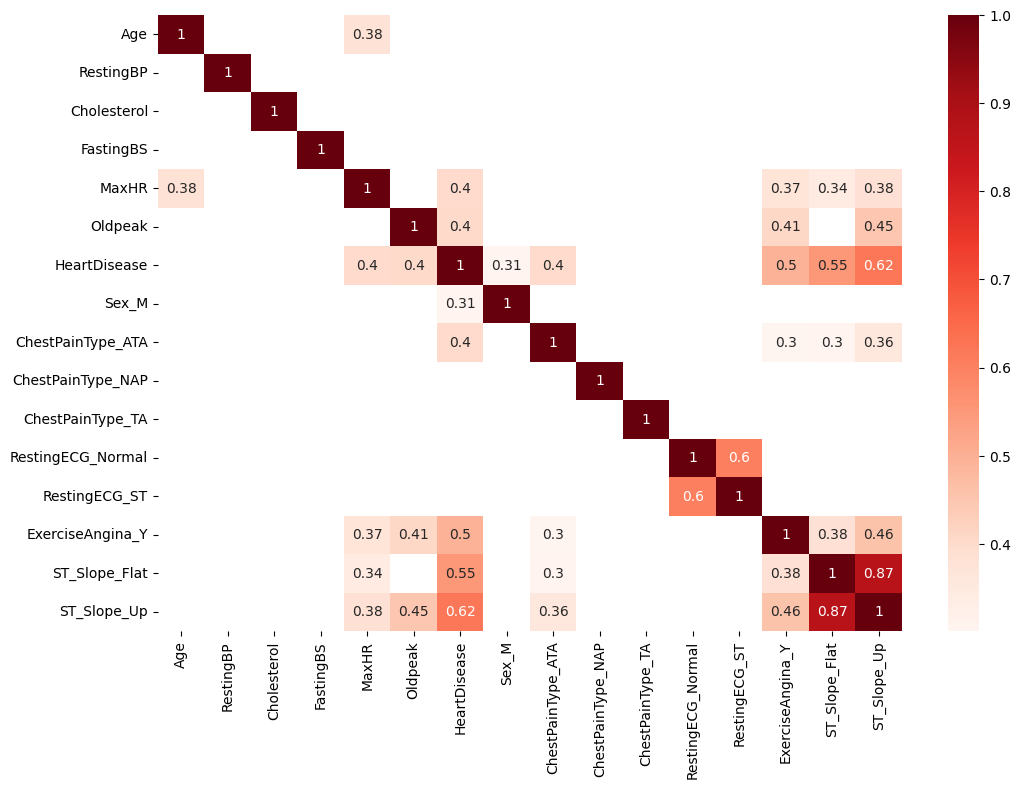

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.30], annot=True, cmap="Reds")
plt.show()

11. Baseline k-NN Experiments

Train separate k-NN models using one feature at a time.
This reveals which individual features contain the most predictive power.

In [25]:
# splitting train/test sets

X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on MaxHR and with k = 3 has an accuracy of 66.67%
The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 76.81%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 44.93%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 84.06%


12. Feature Scaling with MinMaxScaler

k-NN is distance-based, so all features are scaled to the same range.
I apply MinMax scaling to selected top features.

In [26]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 83.33


13. GridSearchCV for Hyperparameter Tuning

Grid search optimizes:


* number of neighbors (k)   
* distance metric (Minkowski, Manhattan)
This identifies the best k-NN configuration for training data.




In [27]:
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    "Oldpeak",
              # "Sex_M", #testing out whether this feature helps or hinders accuracy
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_train_scaled

array([[0.42682927, 0.        , 0.        , 1.        ],
       [0.42682927, 1.        , 1.        , 0.        ],
       [0.48780488, 0.        , 1.        , 0.        ],
       ...,
       [0.51219512, 1.        , 0.        , 1.        ],
       [0.19512195, 0.        , 0.        , 1.        ],
       [0.63414634, 0.        , 1.        , 0.        ]])

In [29]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train);


knn_grid.best_score_*100, knn_grid.best_params_

(np.float64(82.28535980148884), {'metric': 'minkowski', 'n_neighbors': 11})

14. Final Model Evaluation

The tuned model is tested on unseen data (test set).
I compute:

* Final accuracy score
* Confusion matrix

This provides insight into classification performance.



In [30]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 87.68


15. Data Distribution Check

I examine whether certain categories (e.g., Sex_M) are imbalanced across:



* Entire dataset
* Training set
* Test set

Ensures that the test split is fair.




In [31]:
# checking data distribution since test was better than training results

print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64


16. Confusion Matrix Visualization

Finally, you display a confusion matrix to evaluate:

* True Positive
* True Negative
* False Positive
* False Negative

This visually summarizes model performance.






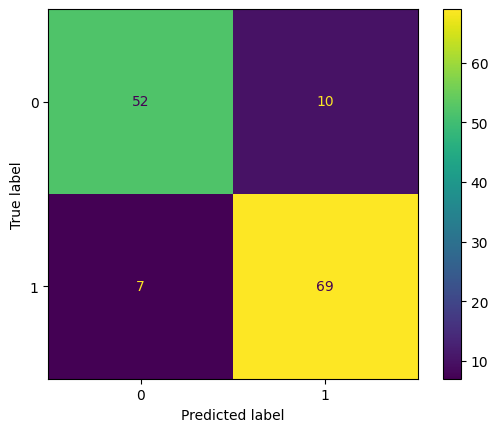

In [32]:
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()